In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [38]:
x_train.shape

(50000, 32, 32, 3)

In [39]:
x_train[0].shape

(32, 32, 3)

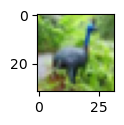

In [40]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[6])

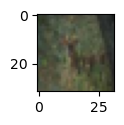

In [41]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[10])

In [42]:
y_train[10]

array([4], dtype=uint8)

In [43]:
x_train=x_train/255

In [44]:
x_train.max()

1.0

In [45]:
x_test=x_test/255

In [46]:
x_test.max(),x_test.min()

(1.0, 0.0)

In [47]:
y_train.shape

(50000, 1)

In [48]:
from tensorflow.keras.utils import to_categorical

In [49]:
y_cat_train=to_categorical(y_train,10)

In [50]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [52]:
y_cat_train.shape

(50000, 10)

In [53]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [54]:
y_cat_test.shape

(10000, 10)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [64]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop= EarlyStopping(monitor='val_loss',patience=2)

In [68]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3748 - loss: 1.6985 - val_accuracy: 0.5554 - val_loss: 1.2436
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5858 - loss: 1.1832 - val_accuracy: 0.6226 - val_loss: 1.0845
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6448 - loss: 1.0133 - val_accuracy: 0.6327 - val_loss: 1.0588
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6923 - loss: 0.8814 - val_accuracy: 0.6648 - val_loss: 0.9644
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7290 - loss: 0.7858 - val_accuracy: 0.6672 - val_loss: 0.9999
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7586 - loss: 0.7025 - val_accuracy: 0.6824 - val_loss: 0.9442
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7841 - loss: 0.6232 - val_accuracy: 0.6794 - val_loss: 0.9613
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8100 - loss: 

In [69]:
losses=pd.DataFrame(model.history.history)

In [71]:
losses[['accuracy','val_accuracy']]

,accuracy,val_accuracy
0,0.46876,0.5554
1,0.60044,0.6226
2,0.65094,0.6327
3,0.69208,0.6648
4,0.72582,0.6672
5,0.75354,0.6824
6,0.77828,0.6794
7,0.80042,0.6793


<Axes: >

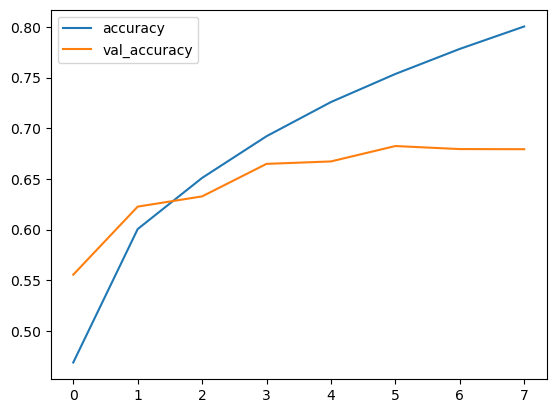

In [72]:
losses[['accuracy','val_accuracy']].plot()

In [73]:
losses[['loss','val_loss']]

,loss,val_loss
0,1.470971,1.243572
1,1.139952,1.084512
2,0.995716,1.058798
3,0.883839,0.964439
4,0.790538,0.999857
5,0.711537,0.944173
6,0.637011,0.961317
7,0.569408,1.020813


<Axes: >

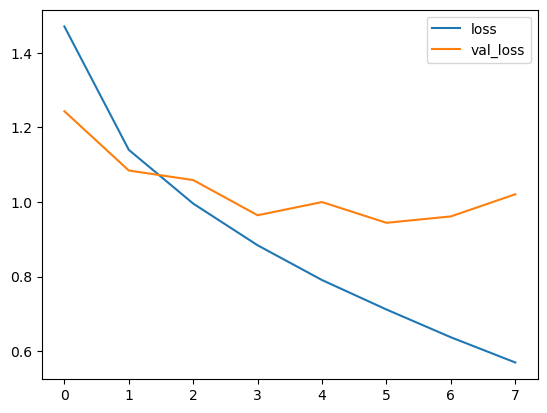

In [74]:
losses[['loss','val_loss']].plot()

In [76]:
model.metrics_names

['loss', 'compile_metrics']

In [79]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6782 - loss: 1.0197


[1.020812749862671, 0.6793000102043152]

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
y_predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [84]:
y_predictions.shape

(10000, 10)

In [86]:
y_predictions=y_predictions.argmax(axis=1)

In [87]:
y_predictions.shape

(10000,)

In [93]:
y_predictions[34]

9

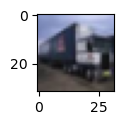

In [94]:
plt.figure(figsize=(1,1))
plt.imshow(x_test[34])

In [96]:
y_test[:7]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1]], dtype=uint8)

In [97]:
y_predictions[:7]

array([3, 8, 0, 0, 4, 6, 5], dtype=int64)

In [98]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1000
           1       0.77      0.83      0.80      1000
           2       0.60      0.54      0.57      1000
           3       0.52      0.46      0.49      1000
           4       0.62      0.66      0.64      1000
           5       0.55      0.60      0.58      1000
           6       0.69      0.80      0.74      1000
           7       0.76      0.68      0.72      1000
           8       0.85      0.70      0.77      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [99]:
confusion_matrix(y_test,y_predictions)

array([[793,  32,  32,  16,  21,  11,  17,  10,  37,  31],
       [ 27, 831,  13,  13,   8,   6,  16,   3,  11,  72],
       [ 83,  11, 540,  57, 105,  80,  72,  29,  11,  12],
       [ 29,  16,  70, 460,  74, 190, 102,  37,   9,  13],
       [ 22,   8,  65,  50, 664,  53,  64,  55,  13,   6],
       [ 19,   6,  61, 164,  53, 602,  39,  44,   5,   7],
       [ 12,  13,  43,  34,  35,  40, 798,  14,   7,   4],
       [ 32,   3,  42,  43,  82,  79,  14, 684,   5,  16],
       [123,  52,  19,  20,  16,  13,   8,   6, 701,  42],
       [ 44, 111,  20,  20,   6,  12,  19,  22,  26, 720]], dtype=int64)

In [100]:
from  sklearn.metrics import ConfusionMatrixDisplay

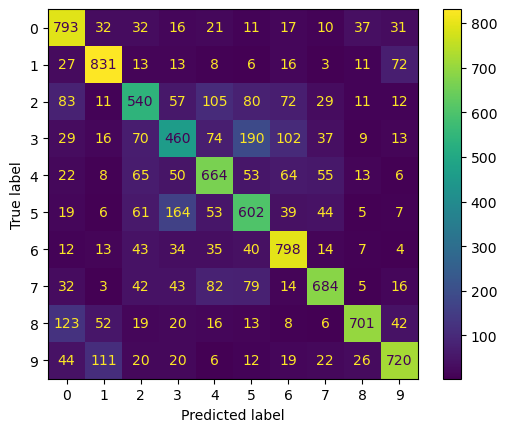

In [101]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predictions)).plot()

In [102]:
new_img=x_test[16]

In [104]:
new_img.shape

(32, 32, 3)

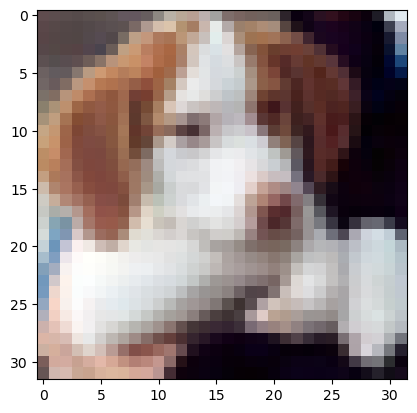

In [105]:
plt.imshow(new_img)

In [107]:
model.predict(new_img.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[4.9593968e-06, 3.9741957e-05, 6.7991734e-04, 1.1491014e-01,
        3.7506311e-06, 8.8122964e-01, 2.2062309e-04, 2.7270622e-03,
        1.6693225e-04, 1.7304597e-05]], dtype=float32)

In [108]:
np.argmax(model.predict(new_img.reshape(1,32,32,3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


5